# General Plotting and Target Analysis

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
targets = pd.read_csv('TESStargets.csv').drop_duplicates(['target_name', 'receiver']).reset_index()

In [3]:
tois = pd.read_csv('tess-toi.csv')
tois.keys()

Index(['TIC ID', 'TOI', 'Previous CTOI', 'Master', 'SG1A', 'SG1B', 'SG2',
       'SG3', 'SG4', 'SG5', 'ACWG ESM', 'ACWG TSM', 'Time Series Observations',
       'Spectroscopy Observations', 'Imaging Observations', 'TESS Disposition',
       'TFOPWG Disposition', 'TESS Mag', 'TESS Mag err', 'Planet Name',
       'Pipeline Signal ID', 'Source', 'RA', 'Dec', 'PM RA (mas/yr)',
       'PM RA err (mas/yr)', 'PM Dec (mas/yr)', 'PM Dec err (mas/yr)',
       'Epoch (BJD)', 'Epoch (BJD) err', 'Period (days)', 'Period (days) err',
       'Duration (hours)', 'Duration (hours) err', 'Depth (mmag)',
       'Depth (mmag) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth)', 'Planet Radius (R_Earth) err',
       'Planet Insolation (Earth Flux)', 'Planet Equil Temp (K)', 'Planet SNR',
       'Stellar Distance (pc)', 'Stellar Distance (pc) err',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar log(g) (cm/s^2) err',
       'Stellar 

In [4]:
targets['distance'] = np.ones(len(targets.target_name))
targets['period'] = np.ones(len(targets.target_name))
targets['TOI'] = np.ones(len(targets.target_name))

uqTargets = {'Target Name': [], 'Band': []}

for ii, tt in enumerate(targets.target_name):
    whereTarget = np.where(int(tt[3:]) == tois['TIC ID'])[0]
    
    #print(float(tois['Stellar Distance (pc)'][whereTarget]))
    
    targets['distance'][ii] = float(tois['Stellar Distance (pc)'][whereTarget])
    targets['period'][ii] = float(tois['Period (days)'][whereTarget])
    targets['TOI'][ii] = float(tois['TOI'][whereTarget])
    
for target in targets.target_name.unique():
    
    uqTargets['Target Name'].append(target)
    
    whereTarg = np.where(target == targets.target_name.to_numpy())[0]
    
    band = ''
    for index in whereTarg:
        rcv = targets.receiver.to_numpy()[index]
        
        if rcv == 'Rcvr1_2':
            band += 'L'
        elif rcv == 'Rcvr2_3':
            band += 'S'
        elif rcv == 'Rcvr4_6':
            band += 'C'
        else:
            band += 'X'
            
    uqTargets['Band'].append(band)

<ipython-input-4-0b393db51c99>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targets['distance'][ii] = float(tois['Stellar Distance (pc)'][whereTarget])
<ipython-input-4-0b393db51c99>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targets['period'][ii] = float(tois['Period (days)'][whereTarget])
<ipython-input-4-0b393db51c99>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targets['TOI'][ii] = float(tois['TOI'][whereTarget])


In [5]:
targInfo = targets.drop_duplicates('target_name')

uqTargets['Time (UTC)'] = targInfo.utc_observed
uqTargets['RA (hrs)'] = targInfo.ra_hrs
uqTargets['Dec ($^\circ$)'] = targInfo.dec_deg
uqTargets['Distance (pc)'] = targInfo.distance
uqTargets['Orbital Period (days)'] = targInfo.period
uqTargets['TOI'] = targInfo.TOI

In [6]:
targs = pd.DataFrame(uqTargets).reset_index()

In [7]:
print(targs.Band)
for ii, band in enumerate(targs.Band):
    if len(band) > 1:
        newBand = ", ".join([band[i] for i in range(0, len(band))])
        print(newBand)
        targs.Band[ii] = newBand

0      C
1      C
2      S
3     SC
4      S
      ..
56     C
57     X
58     X
59     S
60     C
Name: Band, Length: 61, dtype: object
S, C
S, X
C, X, S


<ipython-input-7-9344bcc96a46>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targs.Band[ii] = newBand


In [8]:
targs

,index,Target Name,Band,Time (UTC),RA (hrs),Dec ($^\circ$),Distance (pc),Orbital Period (days),TOI
0,0,TIC438490744,C,2021-05-31 21:36:00,6.683726,16.589710,63.0507,1.665878,529.01
1,1,TIC147950620,C,2020-06-14 20:37:06,11.188091,69.964782,149.6670,2.310602,1194.01
2,2,TIC458478250,S,2019-11-24 23:54:33,15.476437,66.358710,126.2610,2.255296,1165.01
3,3,TIC344926234,"S, C",2019-11-24 14:43:30,10.103831,3.946493,92.8368,0.493590,634.01
4,5,TIC78154865,S,2020-02-27 01:37:33,9.857821,-4.123319,96.6355,0.493826,638.01
...,...,...,...,...,...,...,...,...,...
56,60,TIC154741689,C,2021-03-17 06:56:40,10.954246,89.086918,206.3680,9.276880,2170.01
57,61,TIC427730490,X,2021-03-22 20:38:42,23.484977,71.506468,144.7170,3.860850,2040.01
58,62,TIC321688498,X,2021-03-22 22:53:26,21.439967,68.640525,58.0924,0.386230,2290.01
59,63,TIC393911494,S,2021-03-28 11:38:19,13.811891,44.911761,121.1670,0.633259,2106.01


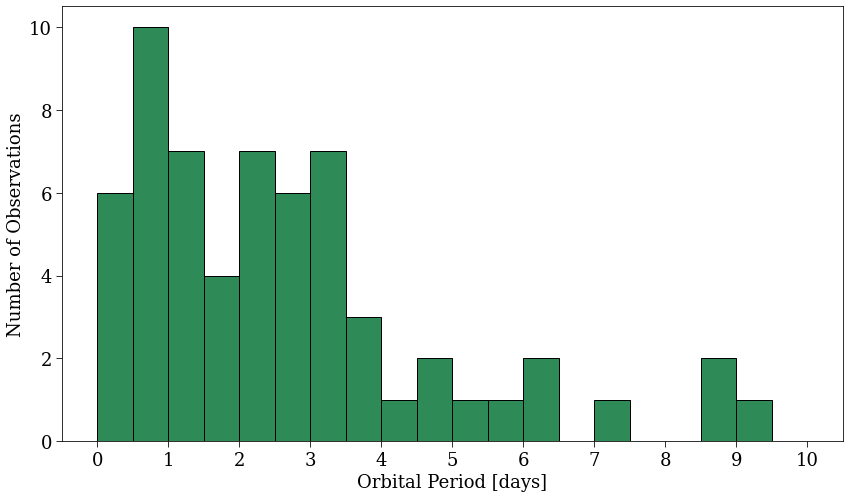

In [9]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import PercentFormatter
from cycler import cycler
ticksize = 6

rcParams['axes.prop_cycle'] = cycler(color=['seagreen','firebrick','dodgerblue',   'darkmagenta', 'burlywood'])
plt.rcParams.update({'font.size' : 18, 'font.family' : 'serif', 'xtick.major.size' : ticksize, 'ytick.major.size' : ticksize,
                    'xtick.minor.size' : ticksize/2, 'ytick.minor.size' : ticksize/2})

fig, ax = plt.subplots(1, figsize=(14,8))
ax.hist(targs['Orbital Period (days)'], bins=20, range=(0,10), edgecolor='k')
#ax.set_xlim(0, 10)
ax.set_xlabel('Orbital Period [days]')
ax.set_ylabel('Number of Observations')
ax.set_xticks(np.arange(0,11));
plt.savefig(os.path.join(os.getenv('HOME'), 'Downloads', 'TargetPeriodsHist.png'))

In [10]:
import os

targs.to_csv(os.path.join(os.getenv('HOME'), 'Downloads', 'TargetInfoList.csv'))

In [11]:
tois.keys()

Index(['TIC ID', 'TOI', 'Previous CTOI', 'Master', 'SG1A', 'SG1B', 'SG2',
       'SG3', 'SG4', 'SG5', 'ACWG ESM', 'ACWG TSM', 'Time Series Observations',
       'Spectroscopy Observations', 'Imaging Observations', 'TESS Disposition',
       'TFOPWG Disposition', 'TESS Mag', 'TESS Mag err', 'Planet Name',
       'Pipeline Signal ID', 'Source', 'RA', 'Dec', 'PM RA (mas/yr)',
       'PM RA err (mas/yr)', 'PM Dec (mas/yr)', 'PM Dec err (mas/yr)',
       'Epoch (BJD)', 'Epoch (BJD) err', 'Period (days)', 'Period (days) err',
       'Duration (hours)', 'Duration (hours) err', 'Depth (mmag)',
       'Depth (mmag) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth)', 'Planet Radius (R_Earth) err',
       'Planet Insolation (Earth Flux)', 'Planet Equil Temp (K)', 'Planet SNR',
       'Stellar Distance (pc)', 'Stellar Distance (pc) err',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar log(g) (cm/s^2) err',
       'Stellar 

In [12]:
# Get fraction of tois with period less than 30 minutes

nLess30 = len(tois[tois['Duration (hours)'] <= 0.5])
n = len(tois)

print(f'Number of TOIs with transit time less than 0.5 hours: {nLess30}')
print(f'Percent of TOIs with transit time less than 0.5 hours: {nLess30/n * 100}')

Number of TOIs with transit time less than 0.5 hours: 31
Percent of TOIs with transit time less than 0.5 hours: 0.7398568019093079


# Calculate Drift Rates
Taken from https://github.com/bricktoast/Test-Drift-Rates/blob/main/trappist_1/Trappist_1_Drift_Rates.ipynb

In [13]:
!pip install PyAstronomy

In [17]:
#general utility packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#nice modules from astropy
import astropy.units as u
import astropy.constants as const

#remind matplotlib how to do 3D plotting
from mpl_toolkits.mplot3d import Axes3D

#builds very nice elliiptical orbits
import PyAstronomy
from PyAstronomy import pyasl

ModuleNotFoundError: No module named 'PyAstronomy'

In [16]:
G = const.G
c = 3 * 10**8
def drift_rates(semimajor, period, e, omega, i, w, stellar_mass, num_timestep):
    ke = pyasl.KeplerEllipse(semimajor, period, e, Omega = omega,i = i,w = w)
    # Build the ellipse
    t = np.linspace(0, period, num_timestep)
    # Make a time axis
    pos = ke.xyzPos(t)
    radius = ke.radius(t)
    total_acc = G*stellar_mass*u.Msun/(radius* u.au)**2
    z_acceleration_array = []
    vector_to_earth = [0,0,1]
    for i in range(0, num_timestep):
        position_vector = ke.xyzPos(t)[i,:]
        radius = ke.radius(t)
        # vector from the origin (host star) to the point in the orbit
        z_magnitude = np.dot(vector_to_earth, position_vector) / radius[i]
        # normalized magnitude of the vector in the observer's direction - between -1 and 1
        z_acceleration_array.append((z_magnitude * total_acc[i].si).value/c)
    return z_acceleration_array

In [15]:
!pip list

Package                Version
---------------------- -------------------
bidict                 0.21.3
brotlipy               0.7.0
cachetools             4.2.0
certifi                2020.6.20
cffi                   1.14.3
chardet                3.0.4
conda                  4.9.2
conda-package-handling 1.7.2
cryptography           3.2.1
future                 0.18.2
idna                   2.10
menuinst               1.4.16
mouse                  0.7.1
numpy                  1.20.2
pandas                 1.3.3
pefile                 2019.4.18
pip                    20.2.4
PyAstronomy            0.16.0
pycosat                0.6.3
pycparser              2.20
pynput                 1.7.3
pyOpenSSL              19.1.0
PySocks                1.7.1
python-dateutil        2.8.2
pytz                   2021.3
pywin32                227
quantities             0.12.5
requests               2.24.0
ruamel-yaml            0.15.87
scipy                  1.7.1
setuptools             50.3.1.post20201